In [1]:
import music21
music21.configure.run()


______________________________________________________________________________ 
  
Welcome to the music21 Configuration Assistant. You will be guided through a 
number of questions to install and set up music21. Simply pressing return at a 
prompt will select a default, if available. 

You may run this configuration again at a later time by running 
music21/configure.py. 
  
______________________________________________________________________________ 
  
Defining an XML Reader permits automatically opening music21-generated 
MusicXML in an editor for display and manipulation when calling the show() 
method. Setting this option is highly recommended. 
  
[1] /Applications/MuseScore 4.app 
  
Choose a number from the preceding options (default is 1): 
MusicXML Reader set to: /Applications/MuseScore 4.app 
  
______________________________________________________________________________ 
  
The BSD-licensed music21 software is distributed with a corpus of encoded 
compositions which ar

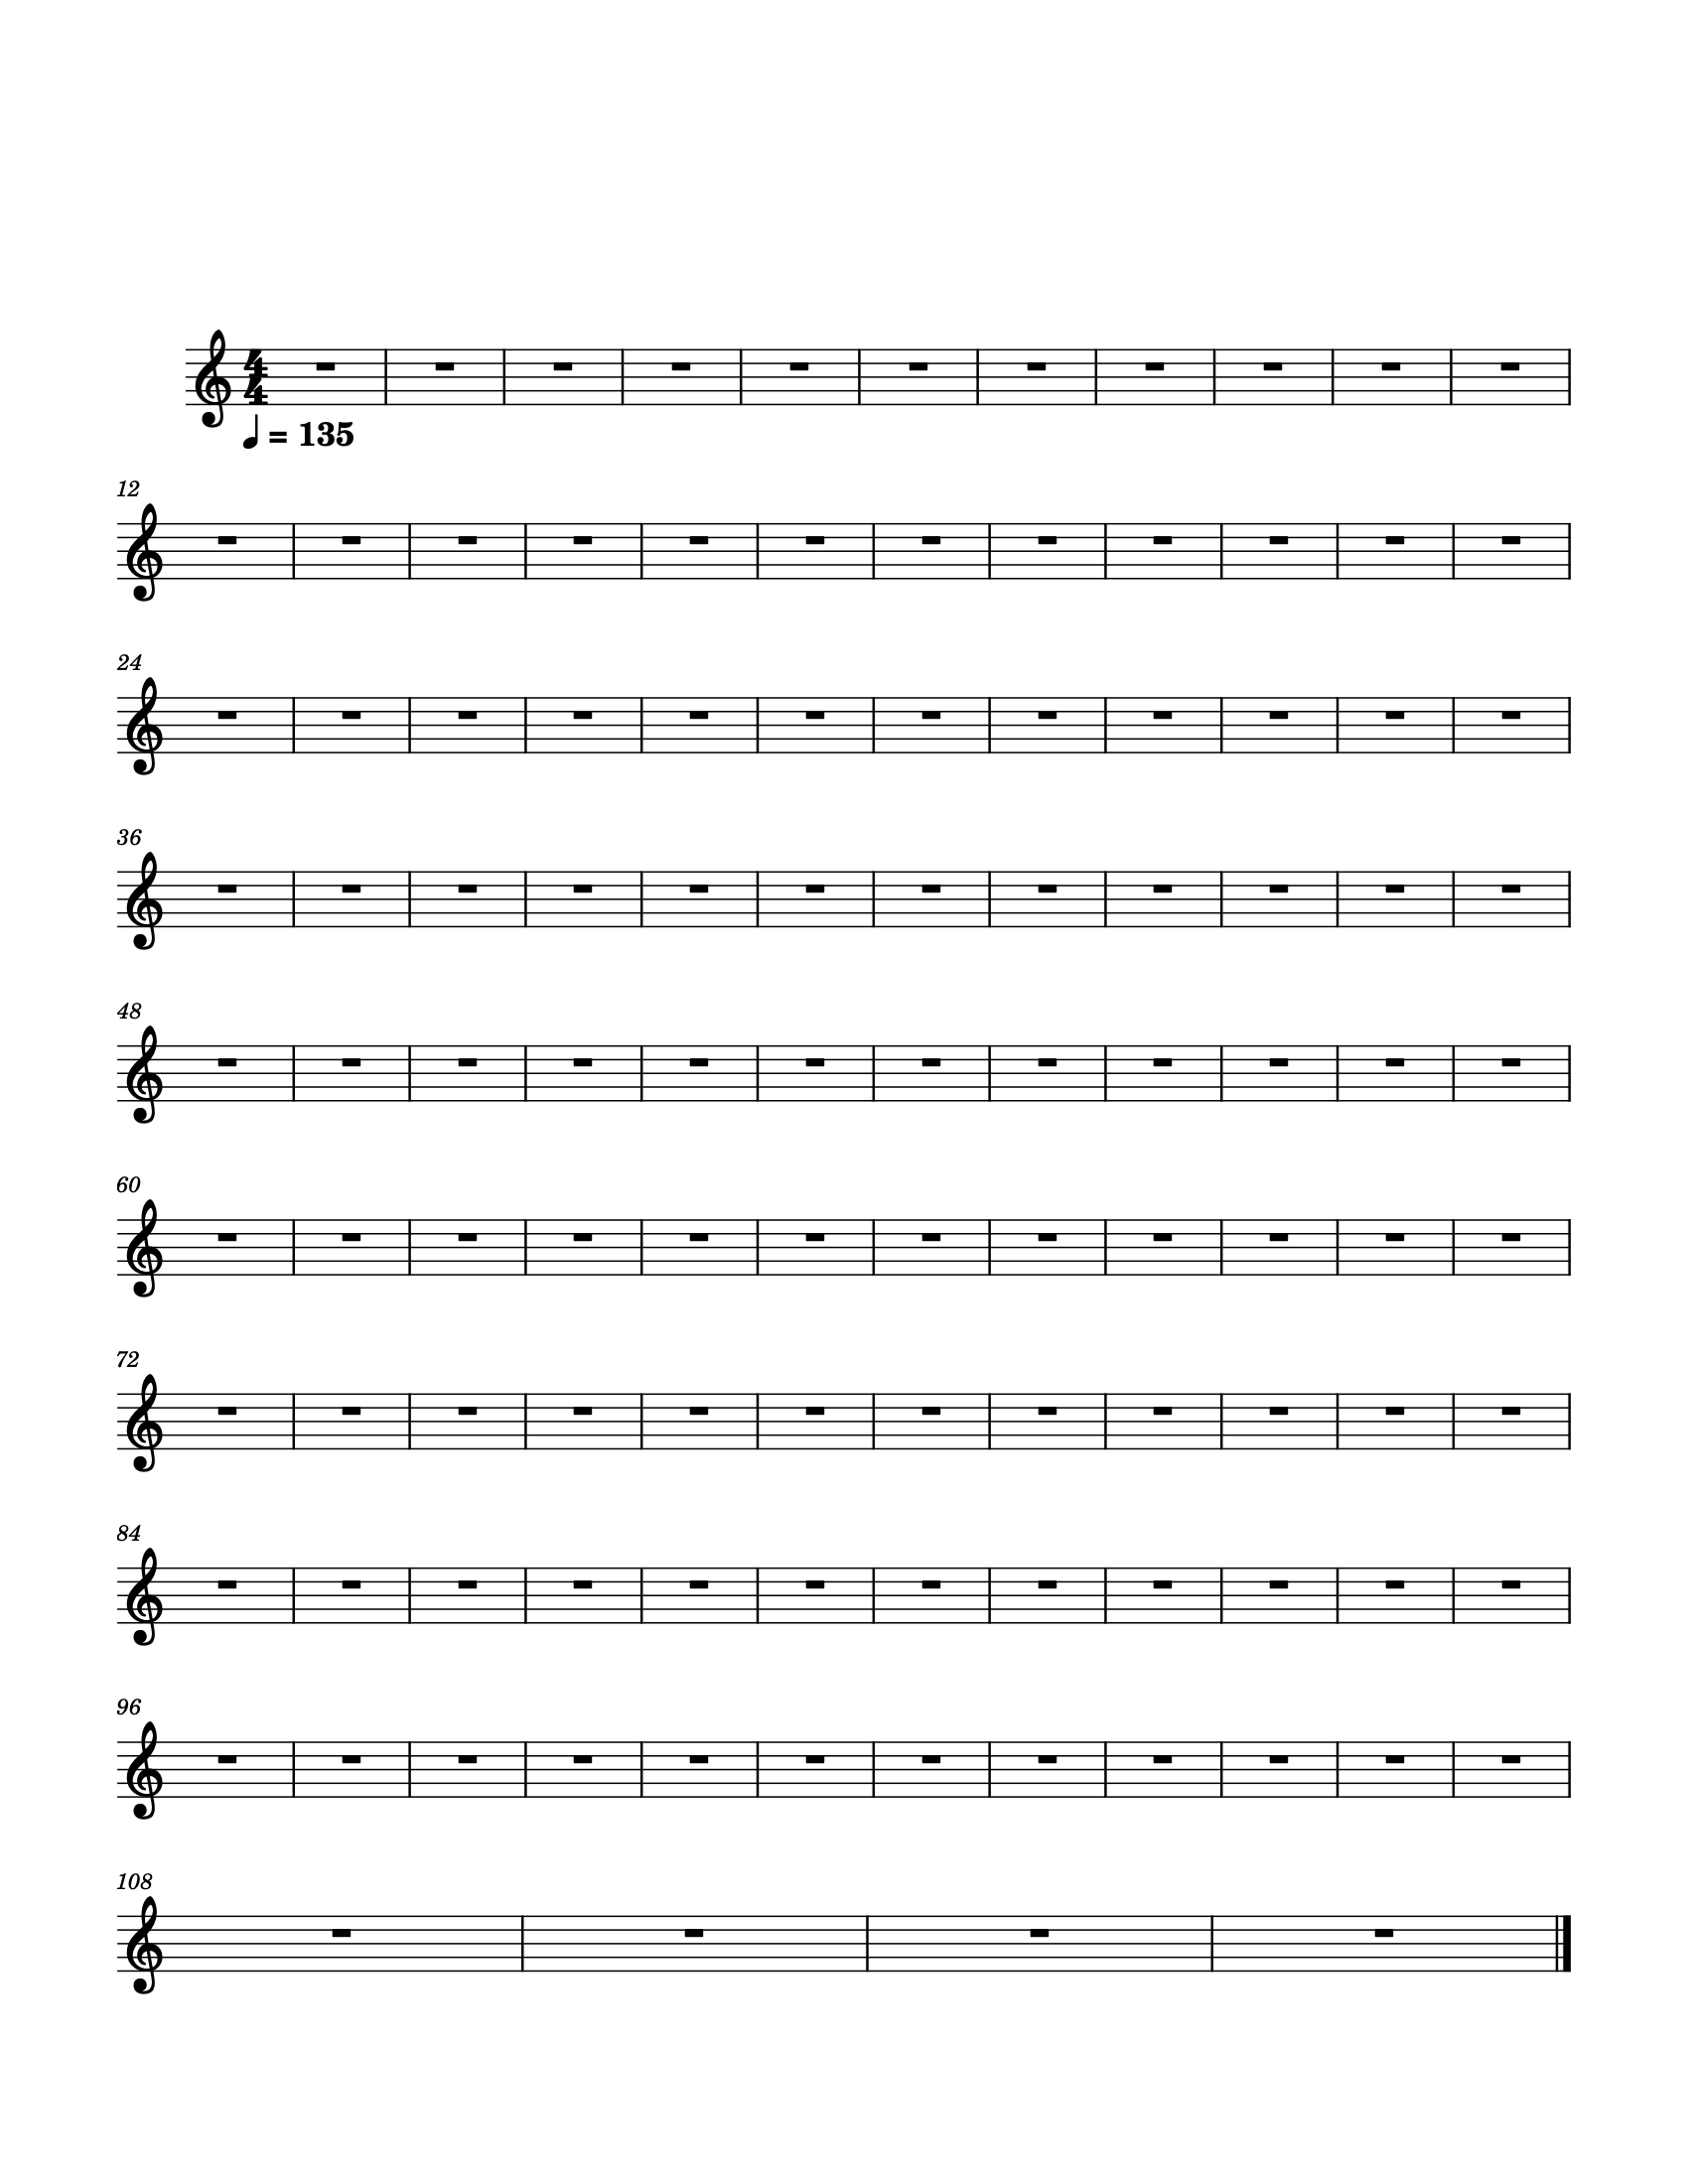

In [2]:
import music21
from music21 import *
us = environment.Environment()
#path where musescore software is installed
us['musescoreDirectPNGPath'] = '/Applications/MuseScore 4.app/Contents/MacOS/mscore'

#MIDI file to read. Change this according to your data
file = "./groove/drummer1/session3/9_rock_135_beat_4-4.mid"

original_score = music21.converter.parse(file).chordify()
original_score.show()

In [3]:
original_score.show('text')

{0.0} <music21.metadata.Metadata object at 0x10b821890>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Instrument 'Midi Drums: Brooklyn'>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark Quarter=135>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Rest whole>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.note.Rest whole>
{8.0} <music21.stream.Measure 3 offset=8.0>
    {0.0} <music21.note.Rest whole>
{12.0} <music21.stream.Measure 4 offset=12.0>
    {0.0} <music21.note.Rest whole>
{16.0} <music21.stream.Measure 5 offset=16.0>
    {0.0} <music21.note.Rest whole>
{20.0} <music21.stream.Measure 6 offset=20.0>
    {0.0} <music21.note.Rest whole>
{24.0} <music21.stream.Measure 7 offset=24.0>
    {0.0} <music21.note.Rest whole>
{28.0} <music21.stream.Measure 8 offset=28.0>
    {0.0} <music21.note.Rest whole>
{32.0} <music21.stream.Measure 9 offset=32.0>
    {0.0} <m

In [4]:
import music21
import time
from music21 import *
from tqdm.notebook import tqdm, trange
import tensorflow as tf
import pandas as pd
from simpletransformers.seq2seq import Seq2SeqModel, Seq2SeqArgs
import logging
import glob
import string
from sklearn.model_selection import train_test_split as tts
import logging

2023-12-01 15:21:27.947840: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
#getting all MIDI files name
files = glob.glob('./groove/*/*/*.mid')

training_notes = []
training_duration = []

for file in tqdm(files):
        notes = []
        durations = []

        #parsing MIDI files one by one
        original_score = music21.converter.parse(file).chordify()

        #depending on the element found in the instrument. Like we would have 'rest' for drums,
        #chords for guitar
        for element in original_score.flat:
            note_name = None
            duration_name  = None

            #metadata  
            if isinstance(element, music21.key.Key):
                note_name = str(element.tonic.name) + ':' + str(element.mode)
                duration_name = "0.0"
            
            #metadata
            elif isinstance(element, music21.meter.TimeSignature):
                note_name = str(element.ratioString) + 'TS'
                duration_name = "0.0"

            elif isinstance(element, music21.chord.Chord):
                note_name = element.pitches[-1].nameWithOctave
                duration_name = str(element.duration.quarterLength)

            # As using drums data, elements found would be 'rest'
            elif isinstance(element, music21.note.Rest):
                note_name = str(element.name)
                duration_name = str(element.duration.quarterLength)

            elif isinstance(element, music21.note.Note):
                note_name = str(element.nameWithOctave)
                duration_name = str(element.duration.quarterLength)

            if note_name and duration_name:
                notes.append(note_name)
                durations.append(duration_name)
        
        #notes and duration hold seuence for one music piece. 
        training_notes.append(notes)
        training_duration.append(durations)

  0%|          | 0/1150 [00:00<?, ?it/s]

/Users/ansel/dev/ai-music/music-demo/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3550: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
print(training_notes[0])
print(training_duration[0])

['C:major', '4/4TS', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest']
['0.0', '0.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.0', '4.

In [8]:
train = []
label = []
window_size = 20
for x,y in zip(training_notes,training_duration):
    
    if len(x)>window_size:
            for index in range(len(x)-1-window_size):
                in_1 = x[index:index+window_size] + ['NA'] + y[index:index+window_size]
                out_1 = x[index+1:index+1+window_size] + ['NA'] + y[index+1:index+1+window_size]
                train.append(in_1)
                label.append(out_1)
    else:
        pass

In [9]:
train_df = pd.DataFrame({'input_text':[x for x in train],'target_text':[x for x in label]})
map_dict = {y:string.ascii_uppercase[x] for x,y in enumerate(sorted(train_df['input_text'].explode().unique()))}

train_df = train_df.applymap(lambda x: ' '.join([map_dict[y] for y in x]))

training, validation = tts(train_df)
training = training.sample(len(training))

/var/folders/cn/6mm7bprd0j78j8p3r6035q680000gn/T/ipykernel_1780/2666899854.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_df = train_df.applymap(lambda x: ' '.join([map_dict[y] for y in x]))


In [10]:
training

,input_text,target_text
9918,M M M M M M M M M M M M M M M M M M M M L E E ...,M M M M M M M M M M M M M M M M M M M M L E E ...
13208,M M M M M M M M M M M M M M M M M M M M L E E ...,M M M M M M M M M M M M M M M M M M M M L E E ...
6837,M M M M M M M M M M M M M M M M M M M M L E E ...,M M M M M M M M M M M M M M M M M M M M L E E ...
1586,M M M M M M M M M M M M M M M M M M M M L E E ...,M M M M M M M M M M M M M M M M M M M M L E E ...
13336,M M M M M M M M M M M M M M M M M M M M L E E ...,M M M M M M M M M M M M M M M M M M M M L E E ...
...,...,...
3185,M M M M M M M M M M M M M M M M M M M M L E E ...,M M M M M M M M M M M M M M M M M M M M L E E ...
3541,M M M M M M M M M M M M M M M M M M M M L E E ...,M M M M M M M M M M M M M M M M M M M M L E E ...
2305,M M M M M M M M M M M M M M M M M M M M L E E ...,M M M M M M M M M M M M M M M M M M M M L E E ...
7153,M M M M M M M M M M M M M M M M M M M M L E E ...,M M M M M M M M M M M M M M M M M M M M L E E ...


In [11]:
#setting up logs
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

#model args to be used
model_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "max_seq_length": 41,
    "train_batch_size": 10,
    "num_train_epochs": 1,
    "save_eval_checkpoints": False,
    "save_model_every_epoch": False,
    "evaluate_generated_text": True,
    "evaluate_during_training_verbose": True,
    "use_multiprocessing": False,
    "manual_seed": 4,
}

encoder_type = "roberta"

#The 1st 3 parameters are model type, encoder and decoder exact model name to be used
model = Seq2SeqModel(
    encoder_type,
    "roberta-base",
    "bert-base-cased",
    args=model_args,
    use_cuda=False,
)

model.train_model(training)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertLMHeadModel were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['bert.encoder.layer.3.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.1.crossattention.self.key.weight', 'bert.encoder.layer.1.crossattention.self.key.bias', 'bert.encoder.layer.3.crossattention.self.query.bias', 'bert.encoder.layer.4.crossattention.self.query.weight', 'bert.encoder.layer.2.crossattention.output.dense.weight', 'bert.encoder.layer.8.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.7.crossattention.self.query.bias', 'bert.encoder.layer.11.crossattention.output.dense.bias', 'bert.enco

  0%|          | 0/10889 [00:00<?, ?it/s]

INFO:simpletransformers.seq2seq.seq2seq_utils: Saving features into cached file cache_dir/roberta-base-bert-base-cased_cached_4110889
INFO:simpletransformers.seq2seq.seq2seq_model: Training started


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1089 [00:00<?, ?it/s]

/Users/ansel/dev/ai-music/music-demo/.venv/lib/python3.11/site-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:639: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
INFO:simpletransformers.seq2seq.seq2seq_model:Saving model into outputs/
INFO:simpletransformers.seq2seq.seq2seq_model: Training of roberta-base-bert-base-cased model complete. Saved to outputs/.


(1089, 0.03977521934933356)

In [12]:
results = model.eval_model(validation)

INFO:simpletransformers.seq2seq.seq2seq_utils: Creating features from dataset file at cache_dir/
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitl

  0%|          | 0/3630 [00:00<?, ?it/s]

2023-12-01 19:55:37.781529: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 19:55:37.785508: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 19:55:37.790107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 19:55:37.790822: I tensorflow/core/platform/cpu_featu

Running Evaluation:   0%|          | 0/454 [00:00<?, ?it/s]

/Users/ansel/dev/ai-music/music-demo/.venv/lib/python3.11/site-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:639: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Generating outputs:   0%|          | 0/454 [00:00<?, ?it/s]

/Users/ansel/dev/ai-music/music-demo/.venv/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `None` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/Users/ansel/dev/ai-music/music-demo/.venv/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:396: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `None` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
/Users/ansel/dev/ai-music/music-demo/.venv/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:418: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
/Users